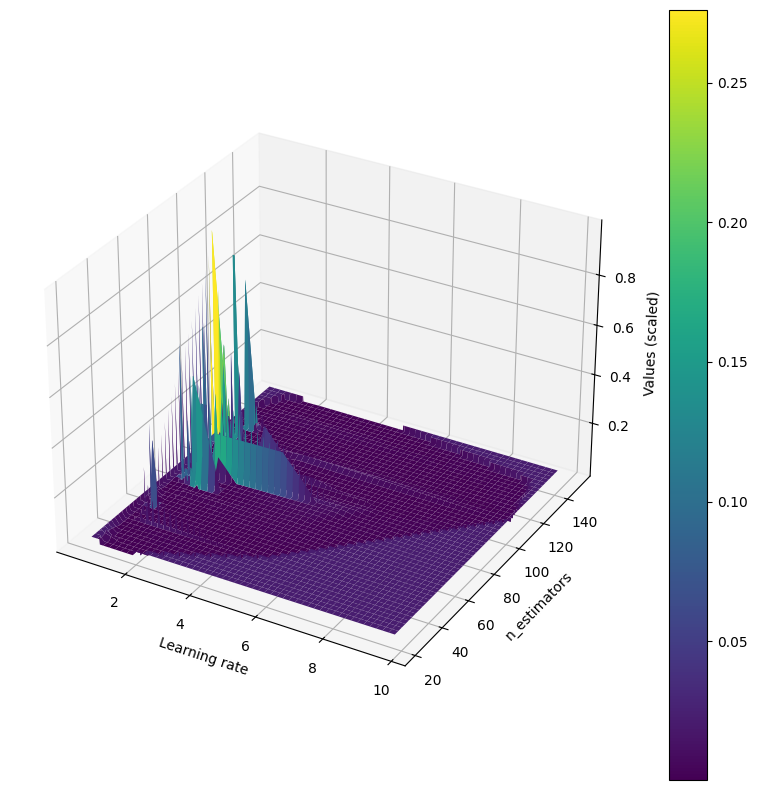

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import json
from sklearn.preprocessing import MinMaxScaler
# Carica i dati dal file JSON
with open('./single_objective_results_with overfit.json', 'r') as f:
    data = json.load(f)
# Estrai i parametri rilevanti
n_estimators = np.array([item['params']['reg_alpha'] for item in data])
learning_rate = np.array([item['params']['num_leaves'] for item in data])
values = np.array([item['values'] for item in data])  # Usa il primo valore della lista dei valori

scaler = MinMaxScaler()
values_scaled = scaler.fit_transform(values.reshape(-1, 1)).flatten()

# Crea una griglia di punti
xi = np.linspace(min(n_estimators), max(n_estimators), 1000)
yi = np.linspace(min(learning_rate), max(learning_rate), 1000)
xi, yi = np.meshgrid(xi, yi)

# Interpola i valori sulla griglia
zi = griddata((n_estimators, learning_rate), values_scaled, (xi, yi), method='linear')

# Gestisci eventuali NaN sostituendoli con il valore medio dei valori scalati
zi = np.nan_to_num(zi, nan=np.mean(values_scaled))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Crea la superficie
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

ax.set_xlabel('Learning rate')
ax.set_ylabel('n_estimators')
ax.set_zlabel('Values (scaled)')

fig.colorbar(surf)
plt.show()


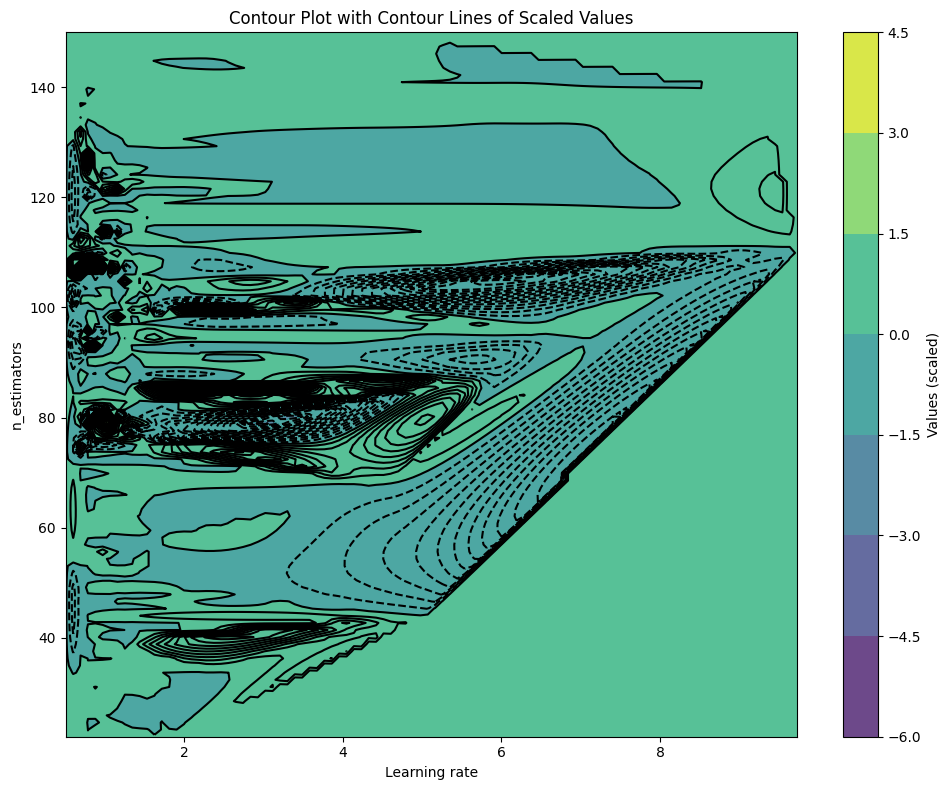

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import json
from sklearn.preprocessing import MinMaxScaler

# Carica i dati dal file JSON
with open('./single_objective_results_with overfit.json', 'r') as f:
    data = json.load(f)

# Estrai i parametri rilevanti
n_estimators = np.array([item['params']['reg_alpha'] for item in data])
learning_rate = np.array([item['params']['num_leaves'] for item in data])
values = np.array([item['values'] for item in data])  # Usa il primo valore della lista dei valori

scaler = MinMaxScaler()
values_scaled = scaler.fit_transform(values.reshape(-1, 1)).flatten()

# Crea una griglia di punti
xi = np.linspace(min(n_estimators), max(n_estimators), 100)
yi = np.linspace(min(learning_rate), max(learning_rate), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpola i valori sulla griglia
zi = griddata((n_estimators, learning_rate), values_scaled, (xi, yi), method='cubic')

# Gestisci eventuali NaN sostituendoli con il valore medio dei valori scalati
zi = np.nan_to_num(zi, nan=np.mean(values_scaled))

# Plot di contour bidimensionale con linee di livello
plt.figure(figsize=(10, 8))
contour = plt.contour(xi, yi, zi, levels=100, colors='black')
plt.contourf(xi, yi, zi, cmap='viridis', alpha=0.8)
plt.colorbar(label='Values (scaled)')
plt.xlabel('Learning rate')
plt.ylabel('n_estimators')
plt.title('Contour Plot with Contour Lines of Scaled Values')

plt.tight_layout()
plt.show()


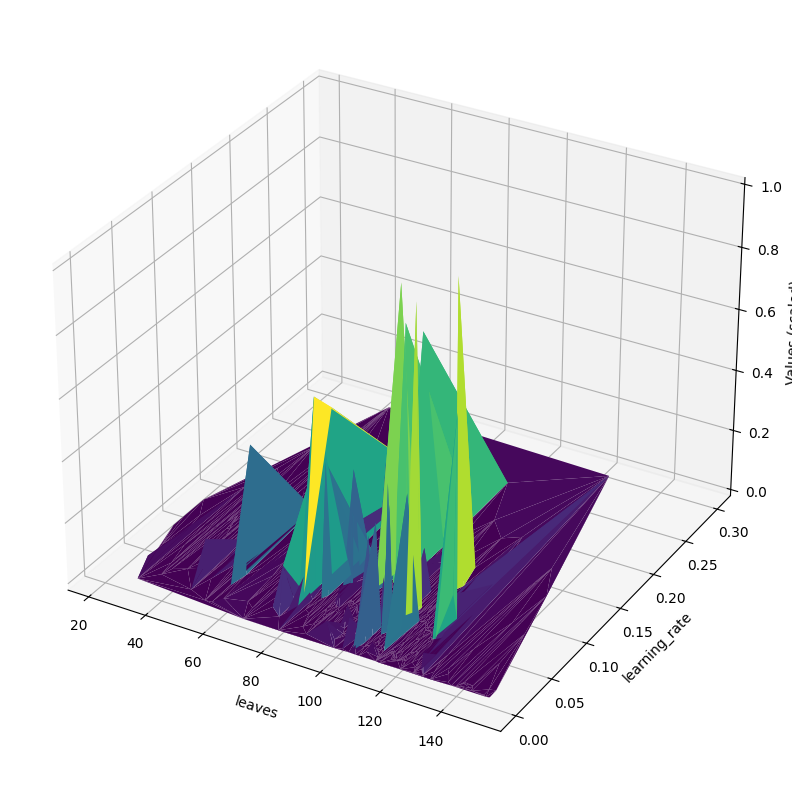

In [2]:
# Estrai i parametri rilevanti
n_estimators = np.array([item['params']['num_leaves'] for item in data])
learning_rate = np.array([item['params']['learning_rate'] for item in data])
values = np.array([item['values']for item in data])  # Usa il primo valore della lista dei valori

# Scala i valori tra 0 e 1
scaler = MinMaxScaler()
values_scaled = scaler.fit_transform(values.reshape(-1, 1)).flatten()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Crea la superficie
ax.plot_trisurf(n_estimators, learning_rate, values_scaled, cmap='viridis', edgecolor='none')

ax.set_xlabel('leaves')
ax.set_ylabel('learning_rate')
ax.set_zlabel('Values (scaled)')

plt.show()

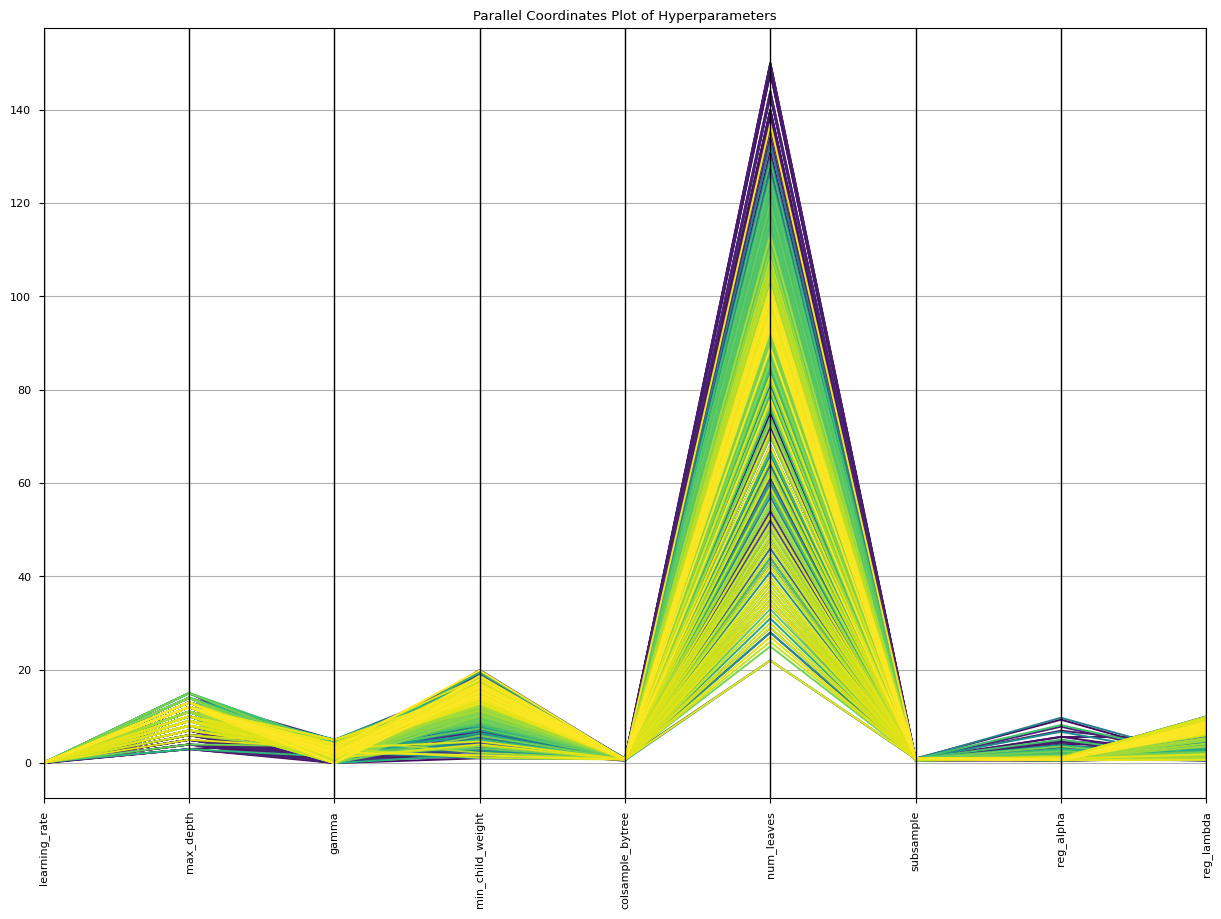

In [7]:
from pandas.plotting import parallel_coordinates
import pandas as pd
import json
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-paper")
colors = ["#F0741E", "#276CB3"]
# Carica i dati dal file JSON
with open('./single_objective_results_with overfit.json', 'r') as f:
    data = json.load(f)
params = [d["params"] for d in data]

# Add 'values' to the dataframe to color the lines by their performance
for i, d in enumerate(data):
    params[i]['values'] = d['values']

# Convert to DataFrame
df = pd.DataFrame(params)

# Create Parallel Coordinates Plot
plt.figure(figsize=(15, 10))
parallel_coordinates(df, 'values', colormap=plt.get_cmap("viridis"))
plt.title('Parallel Coordinates Plot of Hyperparameters')
plt.xticks(rotation=90)
plt.legend().remove()
plt.show()


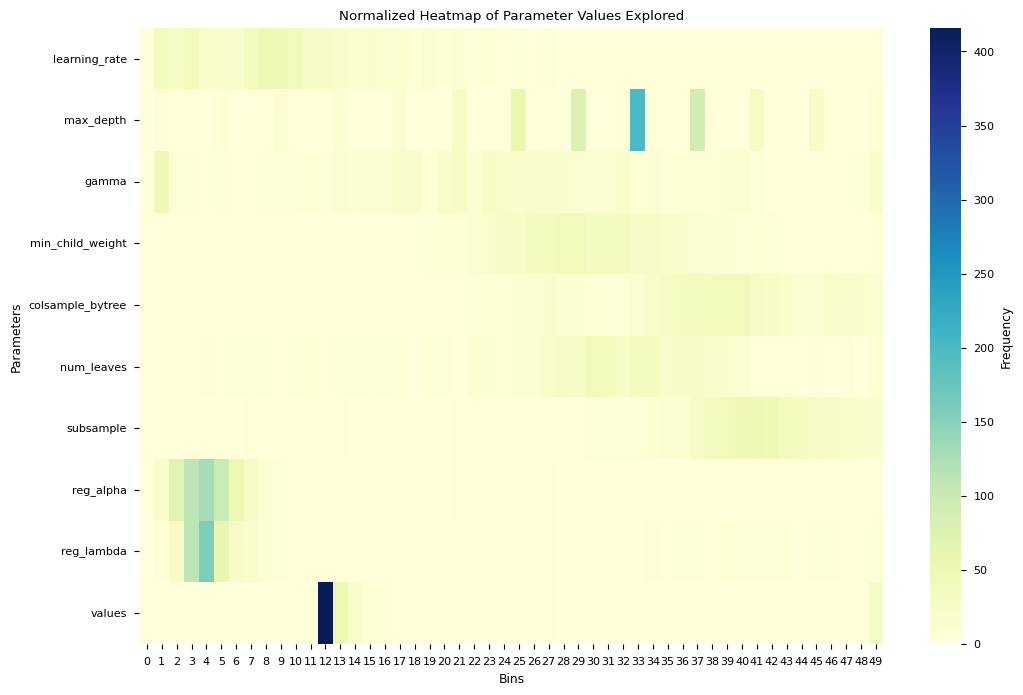

In [13]:
import seaborn as sns
import numpy as np
# Extract params
params = [d["params"] for d in data]
df = pd.DataFrame(params)

# Define the parameter ranges
param_ranges = {
    "learning_rate": (0.001, 0.3),
    "max_depth": (3, 15),
    "gamma": (0.00001, 5),
    "min_child_weight": (1, 20),
    "colsample_bytree": (0.5, 1),
    "num_leaves": (20, 150),
    "subsample": (0.5, 1),
    "reg_alpha": (0.5, 10.0),
    "reg_lambda": (0.5, 10.0)
}

# Normalize the parameters
normalized_df = df.copy()
for param, (min_val, max_val) in param_ranges.items():
    normalized_df[param] = (df[param] - min_val) / (max_val - min_val)

# Create a grid for the heatmap
heatmap_data = []

for param in normalized_df.columns:
    # Create bins for the normalized parameter range
    bins = np.linspace(0, 1, 50)
    
    # Digitize the parameter values into the bins
    digitized = np.digitize(normalized_df[param], bins)
    
    # Create a histogram of the digitized values
    hist, _ = np.histogram(digitized, bins=np.arange(50 + 1))
    
    heatmap_data.append(hist)

# Convert to a DataFrame for easier plotting
heatmap_df = pd.DataFrame(heatmap_data, index=normalized_df.columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, cmap="YlGnBu", cbar_kws={'label': 'Frequency'})
plt.title('Normalized Heatmap of Parameter Values Explored')
plt.xlabel('Bins')
plt.ylabel('Parameters')
plt.show()


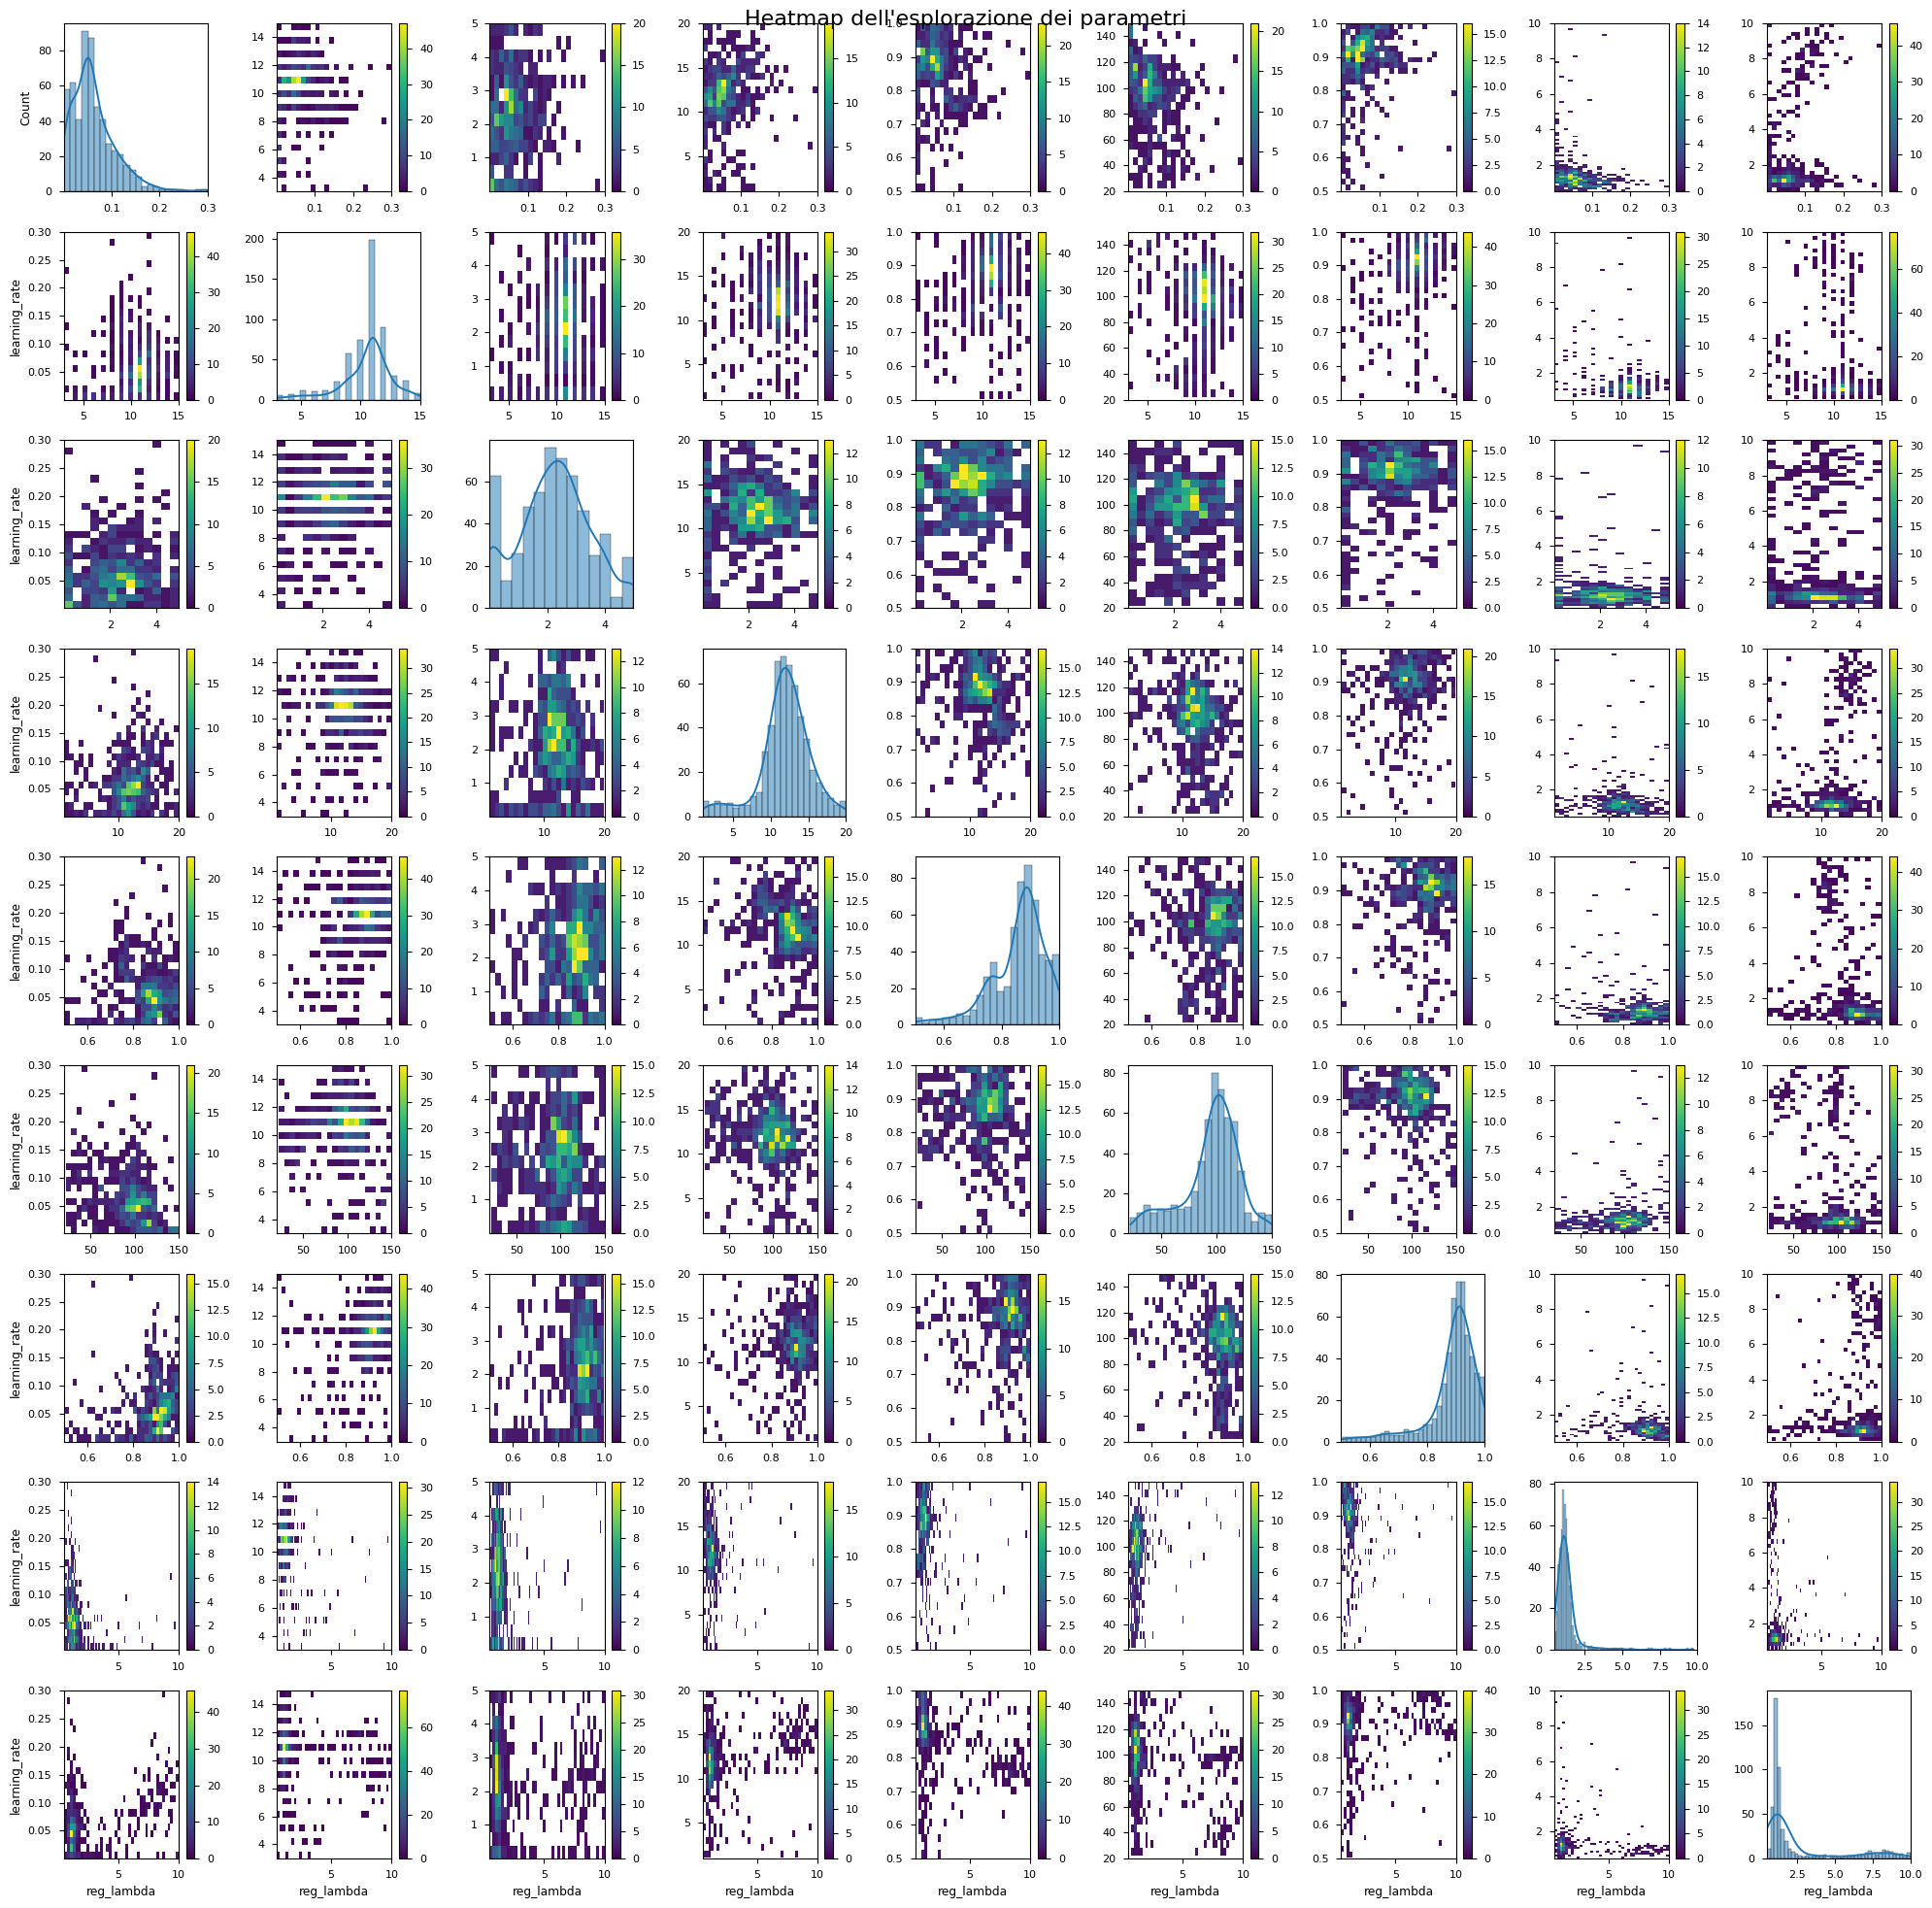

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assumo che 'df' sia il tuo DataFrame con i parametri

# Crea una figura con subplot per ogni coppia di parametri
n_params = len(param_ranges)
fig, axes = plt.subplots(n_params, n_params, figsize=(20, 20))
fig.suptitle('Heatmap dell\'esplorazione dei parametri', fontsize=16)

for i, param1 in enumerate(param_ranges.keys()):
    for j, param2 in enumerate(param_ranges.keys()):
        ax = axes[i, j]
        
        if i != j:
            # Crea la heatmap per coppie di parametri diversi
            sns.histplot(data=df, x=param1, y=param2, ax=ax, cbar=True, cmap='viridis')
            
            # Imposta i limiti degli assi in base ai range definiti
            ax.set_xlim(param_ranges[param1])
            ax.set_ylim(param_ranges[param2])
        else:
            # Sulla diagonale, mostra la distribuzione del singolo parametro
            sns.histplot(data=df, x=param1, ax=ax, kde=True)
            ax.set_xlim(param_ranges[param1])
        
        # Rimuovi le etichette degli assi interni per una visualizzazione più pulita
        if i < n_params - 1:
            ax.set_xlabel('')
        if j > 0:
            ax.set_ylabel('')


plt.tight_layout()
plt.show()

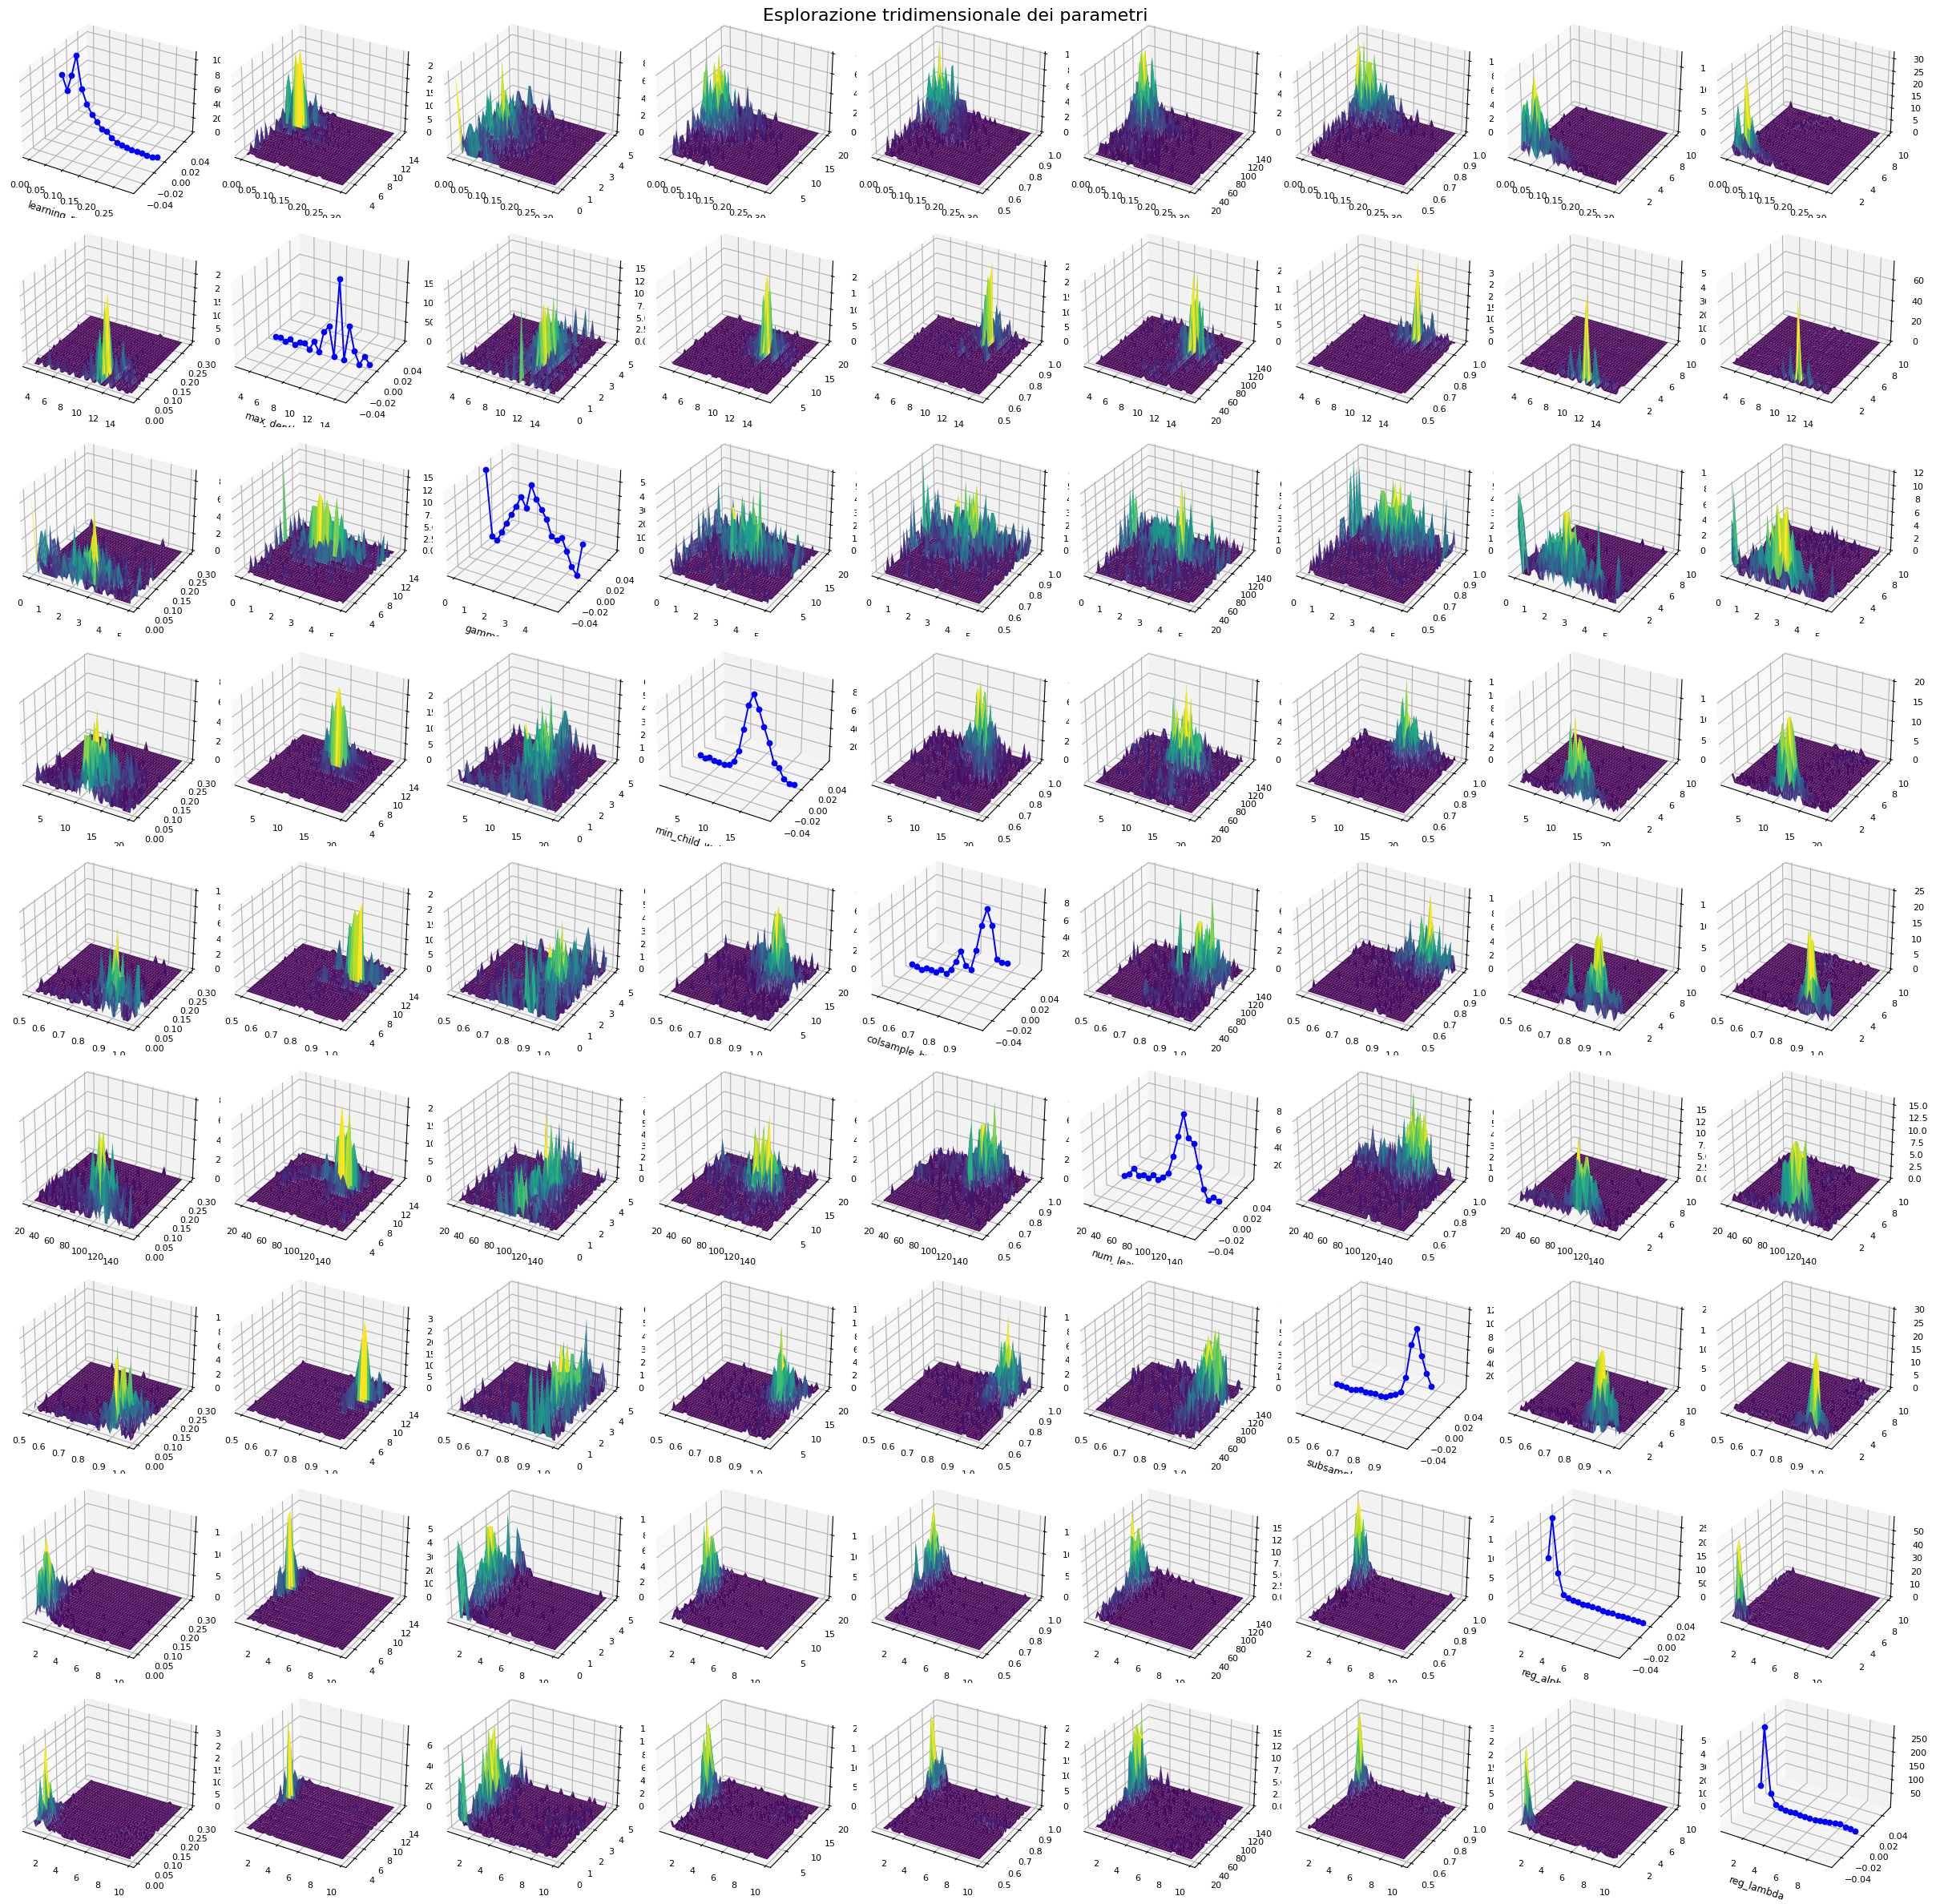

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np

# Assumiamo che 'df' contenga i risultati dell'ottimizzazione di Optuna
# e 'param_ranges' sia un dizionario con i range dei parametri considerati

# Definizione dei parametri e dei range teorici
param_names = list(param_ranges.keys())
param_ranges_values = list(param_ranges.values())

# Creazione di una figura con subplot per ogni coppia di parametri
n_params = len(param_ranges)
fig = plt.figure(figsize=(24, 24))
fig.suptitle('Esplorazione tridimensionale dei parametri', fontsize=16)

# Iterazione su ogni coppia di parametri
for i, param1 in enumerate(param_ranges.keys()):
    for j, param2 in enumerate(param_ranges.keys()):
        ax = fig.add_subplot(n_params, n_params, i * n_params + j + 1, projection='3d')
        
        if i != j:
            # Calcolo della densità di esplorazione per la coppia di parametri (param1, param2)
            param1_values = df[param1].values
            param2_values = df[param2].values
            H, xedges, yedges = np.histogram2d(param1_values, param2_values, bins=40, range=[param_ranges[param1], param_ranges[param2]])
            X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
            Z = H.T
            
            # Plot della superficie tridimensionale
            ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
            # ax.set_xlabel(param1)
            # ax.set_ylabel(param2)
            #ax.set_title(f'Densità di esplorazione di {param1} vs {param2}')
        else:
            # Sulla diagonale, mostra la distribuzione del singolo parametro
            param_values = df[param1].values
            hist, bin_edges = np.histogram(param_values, bins=20, range=param_ranges[param1])
            ax.plot(bin_edges[:-1], hist, zs=0, zdir='y', color='b', marker='o')
            ax.set_xlabel(param1)
            # ax.set_ylabel('Densità di esplorazione')
            # ax.set_zlabel('Frequenza')
            #ax.set_title(f'Distribuzione di {param1}')
        
plt.tight_layout()
plt.show()
